In [171]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [172]:
Value1=pd.read_csv("FFACapeOI 010118 190224.csv")
Value1.set_index("Date",inplace=True)
Value1.rename(columns={"Value":"FFACapeO010118"},inplace=True)

In [173]:
Value2=pd.read_csv("FFADV_C3 010118 190224.csv")
Value2.set_index("Date",inplace=True)
Value2.rename(columns={"Value":"C3010118"},inplace=True)

In [174]:
di_ex=["FFACapeOI 010118 190224.csv",
"FFADV_C3 010118 190224.csv",
"FFADV_C5 010118 190224.csv",
"FFADV_C5TC 010118 190224.csv",
"FFADV_C7 010118 190224.csv",
"FFADVCape_T 020707 190224.csv","ODV_C5TC 010118 190224.csv","OptionsCapeOI 010118 190224.csv"]

In [175]:
Value3=pd.read_csv("FFADV_C5 010118 190224.csv")
Value3.set_index("Date",inplace=True)
Value3.rename(columns={"Value":"C5010118"},inplace=True)

In [176]:
Value4=pd.read_csv("FFADV_C5TC 010118 190224.csv")
Value4.set_index("Date",inplace=True)
Value4.rename(columns={"Value":"C5TC010118"},inplace=True)

In [177]:
Value5=pd.read_csv("FFADVCape_T 020707 190224.csv")
Value5.set_index("Date",inplace=True)
Value5.rename(columns={"Value":"020707"},inplace=True)

In [178]:
Value6=pd.read_csv("ODV_C5TC 010118 190224.csv")
Value6.set_index("Date",inplace=True)
Value6.rename(columns={"Value":"010118"},inplace=True)

In [179]:
Value7=pd.read_csv("OptionsCapeOI 010118 190224.csv")
Value7.set_index("Date",inplace=True)
Value7.rename(columns={"Value":"CapeOI010118"},inplace=True)

In [180]:
df = pd.concat([Value1,Value2,Value3,Value4,Value5,Value6,Value7],axis=1)

In [181]:
df.reset_index(inplace=True)


In [182]:
df.head()

Date  FFACapeO010118  C3010118  C5010118  C5TC010118  020707  010118  \
0  02/01/2018         54040.0       0.0       0.0       475.0   475.0    84.0   
1  08/01/2018         59753.0       0.0       0.0      1360.0  1360.0   180.0   
2  15/01/2018         63213.0       0.0      50.0       730.0   780.0   630.0   
3  22/01/2018         64229.0       0.0       0.0      1480.0  1540.0     0.0   
4  29/01/2018         65683.0       0.0       0.0       414.0   414.0  1395.0   

   CapeOI010118  
0       77208.0  
1       80202.0  
2       81912.0  
3       82662.0  
4       89262.0

In [183]:



df["Date"]=pd.to_datetime(df["Date"])

In [184]:
df = (df.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [185]:
df.set_index("Date",inplace=True)

In [186]:
df[df.index=='07/01/2020']

FFACapeO010118  C3010118  C5010118  C5TC010118  020707  010118  \
Date                                                                         
2020-07-01        124002.0      50.0     220.0      2420.0  2690.0  4500.0   

            CapeOI010118  
Date                      
2020-07-01      168068.0

In [187]:
# df_M=df.resample("W").mean()
df_M=df

In [188]:
df_M.fillna(method="ffill",inplace=True)

In [189]:
df_M.tail()

FFACapeO010118  C3010118  C5010118  C5TC010118  020707  010118  \
Date                                                                         
2023-12-09        187806.0       0.0      50.0      4462.0  4512.0   380.0   
2023-12-10        187806.0       0.0     200.0      4210.0  4410.0   630.0   
2023-12-11        187806.0       0.0     200.0      4210.0  4410.0   630.0   
2023-12-12        187806.0      75.0     500.0      5394.0  5969.0   420.0   
2023-12-13        187806.0       0.0       0.0      6433.0  6433.0  2880.0   

            CapeOI010118  
Date                      
2023-12-09      154653.0  
2023-12-10      154653.0  
2023-12-11      154653.0  
2023-12-12      154653.0  
2023-12-13      154653.0

In [190]:
Data_1=pd.read_csv("ffa1.csv")
Data_1["Date"]=pd.to_datetime(Data_1["Date"],dayfirst=True)
Data_1.set_index("Date",inplace=True)


In [191]:
Data_1.head()

Unnamed: 0  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  \
Date                                                                      
2014-06-02           0      13825.0     16590.0     19070.0     23014.0   
2014-06-03           1      15010.0     18002.0     20302.0     23880.0   
2014-06-04           2      15050.0     18052.0     20372.0     23850.0   
2014-06-05           3      14715.0     17748.0     20094.0     23630.0   
2014-06-06           4      14812.0     17762.0     20114.0     23700.0   

            5TC_C+4MON  5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  \
Date                                                               ...   
2014-06-02     25734.0           0    13825.0   19558.0   27098.0  ...   
2014-06-03     26872.0           0    15010.0   20728.0   28084.0  ...   
2014-06-04     27132.0           0    15050.0   20758.0   27971.0  ...   
2014-06-05     27382.0           0    14715.0   20491.0   27581.0  ...   
2014-06-06     27548.0           0    14812.0   20525.0   27650.0  ...   

            5TC_C+4Q  5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                           
2014-06-02   18853.0   24375.0   30023.0     21981.0     20808.0     20254.0   
2014-06-03   19230.0   24893.0   30483.0     22445.0     21051.0     20396.0   
2014-06-04   19220.0   24808.0   30588.0     22473.0     21001.0     20386.0   
2014-06-05   18918.0   24480.0   30370.0     22267.0     20900.0     20295.0   
2014-06-06   18958.0   24553.0   30473.0     22287.0     20940.0     20294.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2014-06-02     19745.0     19585.0     19418.0     19258.0  
2014-06-03     19836.0     19625.0     19458.0     19298.0  
2014-06-04     19826.0     19625.0     19458.0     19298.0  
2014-06-05     19695.0     19514.0     19357.0     19187.0  
2014-06-06     19695.0     19504.0     19579.0     19177.0  

[5 rows x 21 columns]

In [192]:
Data_2=pd.read_csv("ffa2.csv")
Data_2["Date"]=pd.to_datetime(Data_2["Date"],dayfirst=True)
Data_2.set_index("Date",inplace=True)
Data_3=pd.read_csv("ffa3.csv")
Data_3["Date"]=pd.to_datetime(Data_3["Date"],dayfirst=True)
Data_3.set_index("Date",inplace=True)

In [193]:
Data=pd.concat([Data_2,Data_1,Data_3],axis=0)

In [194]:
Data=Data.iloc[:,1:]

In [195]:
Data

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2019-01-02      16267.0     12592.0     13292.0     13725.0     14042.0   
2019-01-03      15242.0     12233.0     13050.0     13408.0     13692.0   
2019-01-04      15342.0     12308.0     13129.0     13421.0     13696.0   
2019-01-07      16658.0     13133.0     13550.0     13700.0     13958.0   
2019-01-08      16617.0     13442.0     13608.0     13758.0     13992.0   
...                 ...         ...         ...         ...         ...   
2024-02-26      21043.0     25304.0     27514.0     27621.0     27264.0   
2024-02-27      21156.0     27396.0     28896.0     28921.0     27875.0   
2024-02-28      21461.0     30461.0     31236.0     30864.0     29329.0   
2024-02-29      30193.0     30811.0     30507.0     28986.0     27321.0   
2024-03-01      34911.0     34568.0     33179.0     31143.0     28893.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2019-01-02         0.0    14050.0   14242.0   16808.0   20358.0   15300.0   
2019-01-03         0.0    13508.0   13658.0   16483.0   20100.0   15150.0   
2019-01-04         0.0    13593.0   13704.0   16467.0   20083.0   15150.0   
2019-01-07         0.0    14447.0   14158.0   16817.0   20442.0   15208.0   
2019-01-08         0.0    14556.0   14258.0   16942.0   20442.0   15183.0   
...                ...        ...       ...       ...       ...       ...   
2024-02-26     26536.0    22304.0   27467.0   26464.0   26407.0   16093.0   
2024-02-27     27157.0    23039.0   28564.0   27204.0   27039.0   16379.0   
2024-02-28     28000.0    24162.0   30476.0   28125.0   27664.0   16736.0   
2024-02-29     27164.0    24105.0   30101.0   27093.0   26818.0   16443.0   
2024-03-01     28429.0    25678.0   32963.0   28211.0   27907.0   17050.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2019-01-02   15146.0   15683.0     15692.0     13342.0     13408.0   
2019-01-03   15025.0   15567.0     15508.0     13304.0     13396.0   
2019-01-04   15054.0   15592.0     15533.0     13317.0     13442.0   
2019-01-07   15192.0   15767.0     15717.0     13417.0     13475.0   
2019-01-08   15208.0   15783.0     15746.0     13417.0     13483.0   
...              ...       ...         ...         ...         ...   
2024-02-26   19871.0   22893.0     20907.0     19907.0     18936.0   
2024-02-27   20114.0   23171.0     21239.0     20114.0     19057.0   
2024-02-28   20600.0   23636.0     21736.0     20486.0     19436.0   
2024-02-29   20464.0   23514.0     21489.0     20350.0     19336.0   
2024-03-01   21121.0   24174.0     22143.0     20643.0     19539.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2019-01-02     13783.0     14050.0     14054.0     14054.0  
2019-01-03     13733.0     14033.0     14033.0     14033.0  
2019-01-04     13738.0     14046.0     14038.0     14038.0  
2019-01-07     13767.0     14075.0     14058.0     14058.0  
2019-01-08     13767.0     14075.0     14050.0     14050.0  
...                ...         ...         ...         ...  
2024-02-26     18443.0     18179.0     18107.0     18057.0  
2024-02-27     18543.0     18250.0     18164.0     18107.0  
2024-02-28     18829.0     18393.0     18300.0     18243.0  
2024-02-29     18814.0     18379.0     18300.0     18250.0  
2024-03-01     19021.0     18483.0     18350.0     18357.0  

[2541 rows x 20 columns]

In [196]:
Data.reset_index(inplace=True)

In [197]:
Data

Date  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
0    2019-01-02      16267.0     12592.0     13292.0     13725.0     14042.0   
1    2019-01-03      15242.0     12233.0     13050.0     13408.0     13692.0   
2    2019-01-04      15342.0     12308.0     13129.0     13421.0     13696.0   
3    2019-01-07      16658.0     13133.0     13550.0     13700.0     13958.0   
4    2019-01-08      16617.0     13442.0     13608.0     13758.0     13992.0   
...         ...          ...         ...         ...         ...         ...   
2536 2024-02-26      21043.0     25304.0     27514.0     27621.0     27264.0   
2537 2024-02-27      21156.0     27396.0     28896.0     28921.0     27875.0   
2538 2024-02-28      21461.0     30461.0     31236.0     30864.0     29329.0   
2539 2024-02-29      30193.0     30811.0     30507.0     28986.0     27321.0   
2540 2024-03-01      34911.0     34568.0     33179.0     31143.0     28893.0   

      5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  5TC_C+4Q  5TC_C+5Q  \
0            0.0    14050.0   14242.0   16808.0  ...   15300.0   15146.0   
1            0.0    13508.0   13658.0   16483.0  ...   15150.0   15025.0   
2            0.0    13593.0   13704.0   16467.0  ...   15150.0   15054.0   
3            0.0    14447.0   14158.0   16817.0  ...   15208.0   15192.0   
4            0.0    14556.0   14258.0   16942.0  ...   15183.0   15208.0   
...          ...        ...       ...       ...  ...       ...       ...   
2536     26536.0    22304.0   27467.0   26464.0  ...   16093.0   19871.0   
2537     27157.0    23039.0   28564.0   27204.0  ...   16379.0   20114.0   
2538     28000.0    24162.0   30476.0   28125.0  ...   16736.0   20600.0   
2539     27164.0    24105.0   30101.0   27093.0  ...   16443.0   20464.0   
2540     28429.0    25678.0   32963.0   28211.0  ...   17050.0   21121.0   

      5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
0      15683.0     15692.0     13342.0     13408.0     13783.0     14050.0   
1      15567.0     15508.0     13304.0     13396.0     13733.0     14033.0   
2      15592.0     15533.0     13317.0     13442.0     13738.0     14046.0   
3      15767.0     15717.0     13417.0     13475.0     13767.0     14075.0   
4      15783.0     15746.0     13417.0     13483.0     13767.0     14075.0   
...        ...         ...         ...         ...         ...         ...   
2536   22893.0     20907.0     19907.0     18936.0     18443.0     18179.0   
2537   23171.0     21239.0     20114.0     19057.0     18543.0     18250.0   
2538   23636.0     21736.0     20486.0     19436.0     18829.0     18393.0   
2539   23514.0     21489.0     20350.0     19336.0     18814.0     18379.0   
2540   24174.0     22143.0     20643.0     19539.0     19021.0     18483.0   

      5TC_C+6CAL  5TC_C+7CAL  
0        14054.0     14054.0  
1        14033.0     14033.0  
2        14038.0     14038.0  
3        14058.0     14058.0  
4        14050.0     14050.0  
...          ...         ...  
2536     18107.0     18057.0  
2537     18164.0     18107.0  
2538     18300.0     18243.0  
2539     18300.0     18250.0  
2540     18350.0     18357.0  

[2541 rows x 21 columns]

In [198]:
Data=Data.drop_duplicates()

In [199]:
Data_F = (Data.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date']).fillna(method="ffill")
      .reset_index())

In [200]:
Data_F

Date  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
0    2018-02-01      12160.0     14770.0     16340.0     16670.0     16950.0   
1    2018-02-02      12680.0     15760.0     16790.0     17120.0     17240.0   
2    2018-02-03      12680.0     15760.0     16790.0     17120.0     17240.0   
3    2018-02-04      12680.0     15760.0     16790.0     17120.0     17240.0   
4    2018-02-05      12380.0     15470.0     16640.0     17060.0     17130.0   
...         ...          ...         ...         ...         ...         ...   
2137 2023-12-09      32296.0     16164.0      9900.0     12075.0     13736.0   
2138 2023-12-10      32296.0     16164.0      9900.0     12075.0     13736.0   
2139 2023-12-11      33729.0     15950.0      9904.0     11964.0     13857.0   
2140 2023-12-12      36643.0     17921.0     10764.0     12604.0     14600.0   
2141 2023-12-13      35061.0     16000.0     10168.0     12107.0     14350.0   

      5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  ...  5TC_C+4Q  5TC_C+5Q  \
0            0.0    13465.0   16653.0   18270.0  ...   13830.0   14830.0   
1            0.0    14220.0   17050.0   18580.0  ...   13950.0   14970.0   
2            0.0    14220.0   17050.0   18580.0  ...   13950.0   14970.0   
3            0.0    14220.0   17050.0   18580.0  ...   13950.0   14970.0   
4            0.0    13925.0   16943.0   18630.0  ...   14060.0   15080.0   
...          ...        ...       ...       ...  ...       ...       ...   
2137     15557.0    27285.0   12713.0   15968.0  ...   19489.0   11643.0   
2138     15557.0    27285.0   12713.0   15968.0  ...   19489.0   11643.0   
2139     15657.0    27763.0   12606.0   16175.0  ...   19625.0   11779.0   
2140     16350.0    28734.0   13763.0   17057.0  ...   19986.0   12136.0   
2141     16136.0    28207.0   12758.0   16639.0  ...   19714.0   11943.0   

      5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  5TC_C+4CAL  5TC_C+5CAL  \
0      16790.0     16520.0     15530.0     15140.0     15000.0     15010.0   
1      16870.0     16575.0     15520.0     15160.0     15010.0     15020.0   
2      16870.0     16575.0     15520.0     15160.0     15010.0     15020.0   
3      16870.0     16575.0     15520.0     15160.0     15010.0     15020.0   
4      16970.0     16790.0     15640.0     15210.0     15030.0     15030.0   
...        ...         ...         ...         ...         ...         ...   
2137   15550.0     16750.0     16171.0     16446.0     16450.0     16393.0   
2138   15550.0     16750.0     16171.0     16446.0     16450.0     16393.0   
2139   15629.0     16821.0     16200.0     16436.0     16443.0     16386.0   
2140   15971.0     17534.0     16554.0     16657.0     16629.0     16543.0   
2141   15779.0     17030.0     16271.0     16604.0     16604.0     16507.0   

      5TC_C+6CAL  5TC_C+7CAL  
0        15490.0     15530.0  
1        15510.0     15540.0  
2        15510.0     15540.0  
3        15510.0     15540.0  
4        15520.0     15540.0  
...          ...         ...  
2137     16307.0     16307.0  
2138     16307.0     16307.0  
2139     16279.0     16279.0  
2140     16421.0     16400.0  
2141     16386.0     16371.0  

[2142 rows x 21 columns]

In [201]:

Data_F.set_index("Date",inplace=True)

In [202]:
Data_F.head(10)

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2018-02-01      12160.0     14770.0     16340.0     16670.0     16950.0   
2018-02-02      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-03      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-04      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-05      12380.0     15470.0     16640.0     17060.0     17130.0   
2018-02-06      13430.0     16380.0     17410.0     17450.0     17430.0   
2018-02-07      13220.0     16320.0     17350.0     17500.0     17500.0   
2018-02-08      13850.0     16860.0     18010.0     17720.0     17670.0   
2018-02-09      14350.0     16970.0     18150.0     17780.0     17710.0   
2018-02-10      14350.0     16970.0     18150.0     17780.0     17710.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2018-02-01         0.0    13465.0   16653.0   18270.0   21480.0   13830.0   
2018-02-02         0.0    14220.0   17050.0   18580.0   21710.0   13950.0   
2018-02-03         0.0    14220.0   17050.0   18580.0   21710.0   13950.0   
2018-02-04         0.0    14220.0   17050.0   18580.0   21710.0   13950.0   
2018-02-05         0.0    13925.0   16943.0   18630.0   21790.0   14060.0   
2018-02-06         0.0    14905.0   17430.0   18870.0   21940.0   14240.0   
2018-02-07         0.0    14770.0   17450.0   18950.0   22230.0   14380.0   
2018-02-08         0.0    15355.0   17800.0   19050.0   22310.0   14530.0   
2018-02-09         0.0    15660.0   17880.0   19070.0   22360.0   14560.0   
2018-02-10         0.0    15660.0   17880.0   19070.0   22360.0   14560.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2018-02-01   14830.0   16790.0     16520.0     15530.0     15140.0   
2018-02-02   14970.0   16870.0     16575.0     15520.0     15160.0   
2018-02-03   14970.0   16870.0     16575.0     15520.0     15160.0   
2018-02-04   14970.0   16870.0     16575.0     15520.0     15160.0   
2018-02-05   15080.0   16970.0     16790.0     15640.0     15210.0   
2018-02-06   15180.0   17070.0     16940.0     15730.0     15270.0   
2018-02-07   15260.0   17200.0     17040.0     15740.0     15250.0   
2018-02-08   15350.0   17330.0     17090.0     15910.0     15310.0   
2018-02-09   15400.0   17360.0     17140.0     15960.0     15332.0   
2018-02-10   15400.0   17360.0     17140.0     15960.0     15332.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2018-02-01     15000.0     15010.0     15490.0     15530.0  
2018-02-02     15010.0     15020.0     15510.0     15540.0  
2018-02-03     15010.0     15020.0     15510.0     15540.0  
2018-02-04     15010.0     15020.0     15510.0     15540.0  
2018-02-05     15030.0     15030.0     15520.0     15540.0  
2018-02-06     15160.0     15150.0     15530.0     15550.0  
2018-02-07     15180.0     15190.0     15540.0     15560.0  
2018-02-08     15220.0     15220.0     15570.0     15590.0  
2018-02-09     15250.0     15250.0     15570.0     15590.0  
2018-02-10     15250.0     15250.0     15570.0     15590.0

In [203]:
Data_2= Data_F.loc[:,~Data_F.columns.duplicated()]

In [204]:
Data_2.shape

(2142, 20)

In [205]:
# Data_W=Data_2.resample("W-Sun").mean()

In [206]:
Data_W=Data_2

In [207]:
# Data_W.drop("BRXMCOA.",axis=1,inplace=True)

In [208]:
Data_W.tail()

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2023-12-09      32296.0     16164.0      9900.0     12075.0     13736.0   
2023-12-10      32296.0     16164.0      9900.0     12075.0     13736.0   
2023-12-11      33729.0     15950.0      9904.0     11964.0     13857.0   
2023-12-12      36643.0     17921.0     10764.0     12604.0     14600.0   
2023-12-13      35061.0     16000.0     10168.0     12107.0     14350.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  5TC_C+4Q  \
Date                                                                        
2023-12-09     15557.0    27285.0   12713.0   15968.0   18829.0   19489.0   
2023-12-10     15557.0    27285.0   12713.0   15968.0   18829.0   19489.0   
2023-12-11     15657.0    27763.0   12606.0   16175.0   18879.0   19625.0   
2023-12-12     16350.0    28734.0   13763.0   17057.0   19329.0   19986.0   
2023-12-13     16136.0    28207.0   12758.0   16639.0   19007.0   19714.0   

            5TC_C+5Q  5TC_C+6Q  5TC_C+1CAL  5TC_C+2CAL  5TC_C+3CAL  \
Date                                                                 
2023-12-09   11643.0   15550.0     16750.0     16171.0     16446.0   
2023-12-10   11643.0   15550.0     16750.0     16171.0     16446.0   
2023-12-11   11779.0   15629.0     16821.0     16200.0     16436.0   
2023-12-12   12136.0   15971.0     17534.0     16554.0     16657.0   
2023-12-13   11943.0   15779.0     17030.0     16271.0     16604.0   

            5TC_C+4CAL  5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  
Date                                                        
2023-12-09     16450.0     16393.0     16307.0     16307.0  
2023-12-10     16450.0     16393.0     16307.0     16307.0  
2023-12-11     16443.0     16386.0     16279.0     16279.0  
2023-12-12     16629.0     16543.0     16421.0     16400.0  
2023-12-13     16604.0     16507.0     16386.0     16371.0

In [209]:
Data_W.set_index("Date",inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [210]:
Data_new=pd.concat([Data_W,df_M],axis=1)

In [211]:
Data_new.isnull().sum()

5TC_CCURMON       0
5TC_C+1MON        0
5TC_C+2MON        0
5TC_C+3MON        0
5TC_C+4MON        0
5TC_C+5MON        0
5TC_CCURQ         0
5TC_C+1Q          0
5TC_C+2Q          0
5TC_C+3Q          0
5TC_C+4Q          0
5TC_C+5Q          0
5TC_C+6Q          0
5TC_C+1CAL        0
5TC_C+2CAL        0
5TC_C+3CAL        0
5TC_C+4CAL        0
5TC_C+5CAL        0
5TC_C+6CAL        0
5TC_C+7CAL        0
FFACapeO010118    0
C3010118          0
C5010118          0
C5TC010118        0
020707            0
010118            0
CapeOI010118      0
dtype: int64

In [212]:
Tar=pd.read_csv("Target_feature.csv")

Tar["Date"]=pd.to_datetime(Tar["Date"],dayfirst=True)
# Target["Date"]=Target["Date"].dt.date
# Target["Date"]=pd.to_datetime(Target["Date"])

Tar = (Tar.set_index('Date')
      .reindex(pd.date_range('2018-02-01', '2023-12-13', freq='D'))
      .rename_axis(['Date'])
      .reset_index())

Target=Tar.copy()

Target.set_index("Date",inplace=True)



Target.fillna(method="ffill",inplace=True)



# Tag_f=Target.resample("W-SUN").mean()
Tag_f=Target

Tag_f.isnull().sum()

Value                                      0
Value_fshift_3                             0
Value_fshift_7                             0
Value_fshift_14                            0
Value_fshift_21                            0
                                          ..
Avg_Valuest_rollm_210-Valuest_rollm_49     0
Avg_Valuest_rollm_210-Valuest_rollm_63     0
Avg_Valuest_rollm_210-Valuest_rollm_90     0
Avg_Valuest_rollm_210-Valuest_rollm_120    0
Avg_Valuest_rollm_210-Valuest_rollm_180    0
Length: 387, dtype: int64

In [213]:
Tag_f.drop("shift_30",axis=1,inplace=True)

In [214]:
Tag_f.fillna(method="ffill",inplace=True)

In [215]:
Tag_f=Tag_f.iloc[:,:]

In [216]:
Tag_f["shift_15"]=Tag_f["Value"].shift(-30)

In [217]:
Tag_f.shape

(2142, 387)

In [218]:
# Tag_f["shift_2"]=Tag_f["Value"].shift(-2)

In [249]:
cor={}
for i in range(len(Tag_f.columns)):   
    cor[Tag_f.columns[i]]=Tag_f["shift_15"].corr(Tag_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [250]:
Imp_f= {k:v for k,v in cor.items() if v>.50 or v<-.50}
len(Imp_f)

76

In [251]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [252]:
keys

['Value',
 'Value_fshift_3',
 'Value_fshift_7',
 'Value_fshift_14',
 'Value_rollm_3',
 'Value_rollm_7',
 'Value_rollm_14',
 'Value_rollm_21',
 'Value_rollm_28',
 'Value_rollm_35',
 'Value_ewm_3',
 'Value_ewm_7',
 'Value_ewm_14',
 'Value_ewm_21',
 'EMA_Diff_28_14_7',
 'EMA_Diff_35_21_14',
 'EMA_Diff_49_28_21',
 'EMA_Diff_70_35_21',
 'EMA_Value_ewm_3-Value_ewm_90',
 'EMA_Value_ewm_3-Value_ewm_100',
 'EMA_Value_ewm_3-Value_ewm_120',
 'EMA_Value_ewm_3-Value_ewm_150',
 'EMA_Value_ewm_3-Value_ewm_180',
 'EMA_Value_ewm_3-Value_ewm_210',
 'EMA_Value_ewm_14-Value_ewm_42',
 'EMA_Value_ewm_14-Value_ewm_49',
 'EMA_Value_ewm_14-Value_ewm_54',
 'EMA_Value_ewm_14-Value_ewm_63',
 'EMA_Value_ewm_14-Value_ewm_70',
 'EMA_Value_ewm_14-Value_ewm_90',
 'EMA_Value_ewm_14-Value_ewm_100',
 'EMA_Value_ewm_14-Value_ewm_120',
 'EMA_Value_ewm_14-Value_ewm_150',
 'EMA_Value_ewm_14-Value_ewm_180',
 'EMA_Value_ewm_14-Value_ewm_210',
 'EMA_Value_ewm_28-Value_ewm_35',
 'EMA_Value_ewm_28-Value_ewm_42',
 'EMA_Value_ewm_2

In [253]:
Data_new.fillna(method="ffill")

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_C+4MON  \
Date                                                                      
2018-02-01      12160.0     14770.0     16340.0     16670.0     16950.0   
2018-02-02      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-03      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-04      12680.0     15760.0     16790.0     17120.0     17240.0   
2018-02-05      12380.0     15470.0     16640.0     17060.0     17130.0   
...                 ...         ...         ...         ...         ...   
2023-12-09      32296.0     16164.0      9900.0     12075.0     13736.0   
2023-12-10      32296.0     16164.0      9900.0     12075.0     13736.0   
2023-12-11      33729.0     15950.0      9904.0     11964.0     13857.0   
2023-12-12      36643.0     17921.0     10764.0     12604.0     14600.0   
2023-12-13      35061.0     16000.0     10168.0     12107.0     14350.0   

            5TC_C+5MON  5TC_CCURQ  5TC_C+1Q  5TC_C+2Q  5TC_C+3Q  ...  \
Date                                                             ...   
2018-02-01         0.0    13465.0   16653.0   18270.0   21480.0  ...   
2018-02-02         0.0    14220.0   17050.0   18580.0   21710.0  ...   
2018-02-03         0.0    14220.0   17050.0   18580.0   21710.0  ...   
2018-02-04         0.0    14220.0   17050.0   18580.0   21710.0  ...   
2018-02-05         0.0    13925.0   16943.0   18630.0   21790.0  ...   
...                ...        ...       ...       ...       ...  ...   
2023-12-09     15557.0    27285.0   12713.0   15968.0   18829.0  ...   
2023-12-10     15557.0    27285.0   12713.0   15968.0   18829.0  ...   
2023-12-11     15657.0    27763.0   12606.0   16175.0   18879.0  ...   
2023-12-12     16350.0    28734.0   13763.0   17057.0   19329.0  ...   
2023-12-13     16136.0    28207.0   12758.0   16639.0   19007.0  ...   

            5TC_C+5CAL  5TC_C+6CAL  5TC_C+7CAL  FFACapeO010118  C3010118  \
Date                                                                       
2018-02-01     15010.0     15490.0     15530.0         54040.0       0.0   
2018-02-02     15020.0     15510.0     15540.0         54040.0       0.0   
2018-02-03     15020.0     15510.0     15540.0         54040.0       0.0   
2018-02-04     15020.0     15510.0     15540.0         54040.0       0.0   
2018-02-05     15030.0     15520.0     15540.0         54040.0       0.0   
...                ...         ...         ...             ...       ...   
2023-12-09     16393.0     16307.0     16307.0        187806.0       0.0   
2023-12-10     16393.0     16307.0     16307.0        187806.0       0.0   
2023-12-11     16386.0     16279.0     16279.0        187806.0       0.0   
2023-12-12     16543.0     16421.0     16400.0        187806.0      75.0   
2023-12-13     16507.0     16386.0     16371.0        187806.0       0.0   

            C5010118  C5TC010118  020707  010118  CapeOI010118  
Date                                                            
2018-02-01       0.0       475.0   475.0    84.0       77208.0  
2018-02-02      50.0      1510.0  1970.0     0.0       77208.0  
2018-02-03       0.0       475.0   475.0     0.0       77208.0  
2018-02-04       0.0        95.0   475.0     0.0       77208.0  
2018-02-05       0.0      1615.0  1615.0     0.0       77208.0  
...              ...         ...     ...     ...           ...  
2023-12-09      50.0      4462.0  4512.0   380.0      154653.0  
2023-12-10     200.0      4210.0  4410.0   630.0      154653.0  
2023-12-11     200.0      4210.0  4410.0   630.0      154653.0  
2023-12-12     500.0      5394.0  5969.0   420.0      154653.0  
2023-12-13       0.0      6433.0  6433.0  2880.0      154653.0  

[2142 rows x 27 columns]

In [264]:
Final=pd.concat([Data_new,Tag_f[keys]],axis=1)

In [265]:
Final.isnull().sum()

5TC_CCURMON                        0
5TC_C+1MON                         0
5TC_C+2MON                         0
5TC_C+3MON                         0
5TC_C+4MON                         0
                                  ..
EMA_Value_ewm_150-Value_ewm_35     0
EMA_Value_ewm_210-Value_ewm_7      0
EMA_Value_ewm_210-Value_ewm_21     0
EMA_Value_ewm_210-Value_ewm_35     0
shift_15                          30
Length: 103, dtype: int64

In [266]:
Data_f=Final.iloc[:-30,:]

In [267]:
Data_f.isnull().sum()

5TC_CCURMON                       0
5TC_C+1MON                        0
5TC_C+2MON                        0
5TC_C+3MON                        0
5TC_C+4MON                        0
                                 ..
EMA_Value_ewm_150-Value_ewm_35    0
EMA_Value_ewm_210-Value_ewm_7     0
EMA_Value_ewm_210-Value_ewm_21    0
EMA_Value_ewm_210-Value_ewm_35    0
shift_15                          0
Length: 103, dtype: int64

In [268]:
Data_f.shape

(2112, 103)

In [269]:
Data_f.dropna(axis=1,inplace=True)

In [270]:
Data_f.shape

(2112, 103)

In [271]:
f_c=list(Data_f.columns)

In [272]:
f_c.remove("shift_15")

In [273]:
f_c[-10:]

['EMA_Value_ewm_100-Value_ewm_7',
 'EMA_Value_ewm_100-Value_ewm_21',
 'EMA_Value_ewm_100-Value_ewm_35',
 'EMA_Value_ewm_100-Value_ewm_49',
 'EMA_Value_ewm_150-Value_ewm_7',
 'EMA_Value_ewm_150-Value_ewm_21',
 'EMA_Value_ewm_150-Value_ewm_35',
 'EMA_Value_ewm_210-Value_ewm_7',
 'EMA_Value_ewm_210-Value_ewm_21',
 'EMA_Value_ewm_210-Value_ewm_35']

In [274]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_15"].corr(Data_f.iloc[:,i])

# Tag_f["shift_4"].corr(Tag_f["shift_+1"])

In [275]:
Data_f.shape

(2112, 103)

In [276]:
Imp_f= {k:v for k,v in cor.items() if v>.53 or v<-.65}
len(Imp_f)

42

In [277]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [278]:
sorted_dict

{'shift_15': 1.0,
 '5TC_C+1MON': 0.6714083676533953,
 '5TC_CCURQ': 0.6258928574328054,
 '5TC_C+2MON': 0.6181259715416355,
 'Value': 0.6051606214773548,
 '5TC_CCURMON': 0.5989735404612876,
 'Value_rollm_3': 0.5907937059187046,
 'Value_ewm_3': 0.5886610393903577,
 'Value_ewm_7': 0.5819320118512862,
 '5TC_C+1Q': 0.5818196792929669,
 'Value_rollm_7': 0.5790678667617869,
 'EMA_Value_ewm_3-Value_ewm_210': 0.5741832719239123,
 'EMA_Value_ewm_14-Value_ewm_180': 0.5727528057594441,
 'EMA_Value_ewm_14-Value_ewm_210': 0.57205402215697,
 'EMA_Value_ewm_14-Value_ewm_150': 0.5716220882870855,
 'EMA_Value_ewm_3-Value_ewm_180': 0.569741086932254,
 'Value_rollm_14': 0.567866740508915,
 'Value_fshift_3': 0.567831727135109,
 'EMA_Value_ewm_14-Value_ewm_120': 0.5669324733153355,
 'Value_rollm_21': 0.5620987034231512,
 'EMA_Value_ewm_3-Value_ewm_150': 0.5619053655806392,
 'EMA_Value_ewm_14-Value_ewm_100': 0.5605003506306325,
 'Value_ewm_14': 0.5558873820380339,
 'EMA_Value_ewm_14-Value_ewm_90': 0.555864539

In [279]:
Data_f=Data_f[keys]

In [280]:
Data_f.shape

(2112, 42)

In [281]:
f_c=list(Data_f.columns)

f_c.remove("shift_15")

In [282]:
len(f_c)

41

In [283]:
for i in f_c:
    Data_f[i+"_fshift_1"]=Data_f[i].shift(+1)
    Data_f[i+"_fshift_2"]=Data_f[i].shift(+2)
    Data_f[i+"_fshift_3"]=Data_f[i].shift(+3)
    Data_f[i+"_fshift_4"]=Data_f[i].shift(+4)
    Data_f[i+"_fshift_5"]=Data_f[i].shift(+5)
    Data_f[i+"_fshift_6"]=Data_f[i].shift(+6)
    Data_f[i+"_fshift_7"]=Data_f[i].shift(+7)
    Data_f[i+"_fshift_8"]=Data_f[i].shift(+8)

In [284]:
for i in f_c:
    Data_f[i+"_rollm_3"]=Data_f[i].rolling(3).mean()
    Data_f[i+"_rollm_4"]=Data_f[i].rolling(4).mean()
    Data_f[i+"_rollm_6"]=Data_f[i].rolling(6).mean()
    Data_f[i+"_rollm_8"]=Data_f[i].rolling(8).mean()

In [285]:
for i in f_c:
    Data_f[i+"_ewm_3"]=Data_f[i].ewm(3).mean()
    Data_f[i+"_ewm_4"]=Data_f[i].ewm(4).mean()
    Data_f[i+"_ewm_6"]=Data_f[i].ewm(6).mean()
    Data_f[i+"_ewm_8"]=Data_f[i].ewm(8).mean()

In [286]:
for i in f_c: 
            Data_f[i+"_Delta_1"]=Data_f[i]-Data_f[i].shift(1)
            Data_f[i+"_Delta_2"]=Data_f[i]-Data_f[i].shift(2)
            Data_f[i+"_Delta_3"]=Data_f[i]-Data_f[i].shift(3)
            Data_f[i+"_Delta_4"]=Data_f[i]-Data_f[i].shift(4)
            Data_f[i+"_Delta_6"]=Data_f[i]-Data_f[i].shift(6)
                

In [287]:
for i in f_c:
    Data_f[i+"c"]=Data_f[i].shift(1)-Data_f[i].shift(2)
    Data_f[i+"_Delta_1_3"]=Data_f[i].shift(1)-Data_f[i].shift(3)
    Data_f[i+"_Delta_1_4"]=Data_f[i].shift(1)-Data_f[i].shift(4)
    Data_f[i+"_Delta_2_3"]=Data_f[i].shift(2)-Data_f[i].shift(3)
    Data_f[i+"_Delta_2_4"]=Data_f[i].shift(2)-Data_f[i].shift(4)

In [77]:
def calc_slope(x):
    slope=np.polyfit(range(len(x)),x,1)[0]
    return(slope)

for i in f_c:
    Data_f[i+"Slope_3shift"]=Data_f[i].rolling(3).apply(calc_slope)
    Data_f[i+"Slope_4shift"]=Data_f[i].rolling(4).apply(calc_slope)
    Data_f[i+"Slope_6shift"]=Data_f[i].rolling(6).apply(calc_slope)
    Data_f[i+"Slope_8shift"]=Data_f[i].rolling(8).apply(calc_slope)

In [288]:
Data_f.reset_index(inplace=True)

In [289]:
from math import ceil
def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

Data_f["week_of_month"]=Data_f["Date"].apply(week_of_month)

Data_f["week"]=Data_f["Date"].dt.weekofyear

Data_f['Month'] = Data_f['Date'].apply(lambda time: time.month)
Data_f['Day of Week'] = Data_f['Date'].apply(lambda time: time.dayofweek)
Data_f['Year'] = Data_f['Date'].apply(lambda t: t.year)
Data_f['Day'] = Data_f['Date'].apply(lambda t: t.day)

In [290]:
Data_f.head()

Date  5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_C+3MON  5TC_CCURQ  \
0 2018-02-01      12160.0     14770.0     16340.0     16670.0    13465.0   
1 2018-02-02      12680.0     15760.0     16790.0     17120.0    14220.0   
2 2018-02-03      12680.0     15760.0     16790.0     17120.0    14220.0   
3 2018-02-04      12680.0     15760.0     16790.0     17120.0    14220.0   
4 2018-02-05      12380.0     15470.0     16640.0     17060.0    13925.0   

   5TC_C+1Q  5TC_C+4Q  5TC_C+1CAL    Value  ...  \
0   16653.0   13830.0     16520.0  11791.0  ...   
1   17050.0   13950.0     16575.0  11367.0  ...   
2   17050.0   13950.0     16575.0  11367.0  ...   
3   17050.0   13950.0     16575.0  11367.0  ...   
4   16943.0   14060.0     16790.0  11189.0  ...   

   EMA_Value_ewm_28-Value_ewm_180_Delta_1_3  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                               -229.562615   
4                                  0.000000   

   EMA_Value_ewm_28-Value_ewm_180_Delta_1_4  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                               -229.562615   

   EMA_Value_ewm_28-Value_ewm_180_Delta_2_3  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                               -229.562615   
4                                  0.000000   

   EMA_Value_ewm_28-Value_ewm_180_Delta_2_4  week_of_month  week  Month  \
0                                       NaN              1     5      2   
1                                       NaN              1     5      2   
2                                       NaN              1     5      2   
3                                       NaN              1     5      2   
4                               -229.562615              2     6      2   

   Day of Week  Year  Day  
0            3  2018    1  
1            4  2018    2  
2            5  2018    3  
3            6  2018    4  
4            0  2018    5  

[5 rows x 1111 columns]

In [291]:
# Data_f.to_csv("Capesize_lagged_19-23.csv")

In [292]:
# Data_f=pd.read_csv("Capesize_lagged_19-23.csv")


In [293]:
Data_f.set_index("Date",inplace=True)

In [294]:
Data_f=Data_f.iloc[8:,:]

In [295]:
# Data_f.dropna(thresh=68,axis=1,inplace=True)

In [296]:
Data_f.fillna(method="ffill",inplace=True)

In [297]:
Data_f.isnull().sum()

5TC_CCURMON    0
5TC_C+1MON     0
5TC_C+2MON     0
5TC_C+3MON     0
5TC_CCURQ      0
              ..
week           0
Month          0
Day of Week    0
Year           0
Day            0
Length: 1110, dtype: int64

In [298]:
cor={}
for i in range(len(Data_f.columns)):   
    cor[Data_f.columns[i]]=Data_f["shift_15"].corr(Data_f.iloc[:,i])

In [299]:
Imp_f= {k:v for k,v in cor.items() if v>=.585 or v<=-.585}
len(Imp_f)

75

In [300]:
Tag_f["Value"].corr(Final['CapeOI010118'])

-0.16263782552471456

In [301]:
sorted_dict

{'shift_15': 1.0,
 '5TC_C+1MON': 0.6714083676533953,
 '5TC_CCURQ': 0.6258928574328054,
 '5TC_C+2MON': 0.6181259715416355,
 'Value': 0.6051606214773548,
 '5TC_CCURMON': 0.5989735404612876,
 'Value_rollm_3': 0.5907937059187046,
 'Value_ewm_3': 0.5886610393903577,
 'Value_ewm_7': 0.5819320118512862,
 '5TC_C+1Q': 0.5818196792929669,
 'Value_rollm_7': 0.5790678667617869,
 'EMA_Value_ewm_3-Value_ewm_210': 0.5741832719239123,
 'EMA_Value_ewm_14-Value_ewm_180': 0.5727528057594441,
 'EMA_Value_ewm_14-Value_ewm_210': 0.57205402215697,
 'EMA_Value_ewm_14-Value_ewm_150': 0.5716220882870855,
 'EMA_Value_ewm_3-Value_ewm_180': 0.569741086932254,
 'Value_rollm_14': 0.567866740508915,
 'Value_fshift_3': 0.567831727135109,
 'EMA_Value_ewm_14-Value_ewm_120': 0.5669324733153355,
 'Value_rollm_21': 0.5620987034231512,
 'EMA_Value_ewm_3-Value_ewm_150': 0.5619053655806392,
 'EMA_Value_ewm_14-Value_ewm_100': 0.5605003506306325,
 'Value_ewm_14': 0.5558873820380339,
 'EMA_Value_ewm_14-Value_ewm_90': 0.555864539

In [302]:
keys = list(Imp_f.keys())
values = list(Imp_f.values())
sorted_value_index = np.argsort(values)[::-1]
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

In [303]:
X_Final=Data_f[keys]


In [304]:
X_Final.fillna(method="ffill",inplace=True)

In [305]:
X_Final.shape

(2104, 75)

In [306]:
X_Final.tail()

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_CCURQ    Value  \
Date                                                                  
2023-11-09      19104.0     16257.0     10621.0    20306.0  20618.0   
2023-11-10      18986.0     15764.0     10571.0    20102.0  21473.0   
2023-11-11      18986.0     15764.0     10571.0    20102.0  21473.0   
2023-11-12      18986.0     15764.0     10571.0    20102.0  21473.0   
2023-11-13      19861.0     16807.0     11182.0    20742.0  21619.0   

            Value_rollm_3   Value_ewm_3  shift_15  5TC_CCURMON_fshift_1  \
Date                                                                      
2023-11-09   19988.666667  19238.414739   35320.0               17564.0   
2023-11-10   20437.666667  19797.061054   35320.0               19104.0   
2023-11-11   21188.000000  20216.045791   36475.0               18986.0   
2023-11-12   21473.000000  20530.284343   38082.0               18986.0   
2023-11-13   21521.666667  20802.463257   35711.0               18986.0   

            5TC_CCURMON_fshift_2  ...  5TC_C+2MON_ewm_8  5TC_CCURQ_ewm_3  \
Date                              ...                                      
2023-11-09               17214.0  ...      11435.200737     19258.775667   
2023-11-10               17564.0  ...      11339.178433     19469.581750   
2023-11-11               19104.0  ...      11253.825274     19627.686312   
2023-11-12               18986.0  ...      11177.955799     19746.264734   
2023-11-13               18986.0  ...      11178.405155     19995.198551   

            5TC_CCURQ_ewm_4  5TC_CCURQ_ewm_6  5TC_CCURQ_ewm_8   Value_ewm_4  \
Date                                                                          
2023-11-09     19165.664297     19103.721825     19092.014106  19219.616300   
2023-11-10     19352.931437     19246.332993     19204.234761  19670.293040   
2023-11-11     19502.745150     19368.571137     19303.986454  20030.834432   
2023-11-12     19622.596120     19473.346689     19392.654626  20319.267545   
2023-11-13     19846.476896     19654.582876     19542.581890  20579.214036   

             Value_ewm_6   Value_ewm_8  Value_rollm_3_ewm_3  \
Date                                                          
2023-11-09  19564.542928  20054.958474         18882.568346   
2023-11-10  19837.179653  20212.518644         19271.342926   
2023-11-11  20070.868274  20352.572128         19750.507194   
2023-11-12  20271.172806  20477.064114         20181.130396   
2023-11-13  20463.719548  20603.945879         20516.264464   

            Value_rollm_3_ewm_4  
Date                             
2023-11-09         18957.220714  
2023-11-10         19253.309905  
2023-11-11         19640.247924  
2023-11-12         20006.798339  
2023-11-13         20309.772005  

[5 rows x 75 columns]

In [307]:
X_Final.dropna(thresh=60,axis=1,inplace=True)

In [308]:
X_Final.shape

(2104, 75)

In [309]:
X_Final=pd.concat([X_Final,Data_f[["Month","week"]]],axis=1)

In [310]:
X_Final.dropna(thresh=66,axis=1,inplace=True)

In [311]:
X_Final.fillna(method="ffill",inplace=True)

In [312]:
# X_Final.fillna(0,inplace=True)
X_Final[X_Final["UCOEXOT_ewm_4"].isnull()==False]["UCOEXOT_ewm_4"]

KeyError: 'UCOEXOT_ewm_4'

In [313]:
Tag_f.head

<bound method NDFrame.head of               Value  Value_fshift_3  Value_fshift_7  Value_fshift_14  \
Date                                                                   
2018-02-01  11791.0         14065.0         12148.0          17118.0   
2018-02-02  11367.0         13666.0         13421.0          16664.0   
2018-02-03  11367.0         13666.0         13421.0          16664.0   
2018-02-04  11367.0         13666.0         13421.0          16664.0   
2018-02-05  11189.0         12727.0         13936.0          15158.0   
...             ...             ...             ...              ...   
2023-12-09  35320.0         49310.0         41796.0          22447.0   
2023-12-10  35320.0         49310.0         41796.0          22447.0   
2023-12-11  36475.0         42800.0         46681.0          21450.0   
2023-12-12  38082.0         34854.0         51727.0          20029.0   
2023-12-13  35711.0         35320.0         54584.0          22216.0   

            Value_fshift_21  Valu

In [314]:
# columns=['MRYAB03', 'BREXPIOCA', 'shift_4', 'BREXPIOCA_fshift_1',
#        'BREXPIOCA_fshift_2', 'BREXPIOCA_fshift_3', 'BREXPIOCA_rollm_3', 'BREXPIOCA_rollm_4',
#        'BREXPIOCA_rollm_6', 'BREXPIOCA_rollm_8',
#        'CHCN.G.MM_ewm_4', 'CHCN.G.MM_ewm_6', 'CHCN.G.MM_ewm_8',
#        'BREXPIOCA_ewm_3', 'BREXPIOCA_ewm_4', 'SHJGXCN_ewm_8', 'UCOEXOT_ewm_3',
#        'UCOEXOT_ewm_4']

In [315]:
X_Final.dropna(thresh=204,axis=1,inplace=True)

In [316]:
X_Final.shape

(2104, 77)

In [317]:
X_Final.columns

Index(['5TC_CCURMON', '5TC_C+1MON', '5TC_C+2MON', '5TC_CCURQ', 'Value',
       'Value_rollm_3', 'Value_ewm_3', 'shift_15', '5TC_CCURMON_fshift_1',
       '5TC_CCURMON_fshift_2', '5TC_C+1MON_fshift_1', '5TC_C+1MON_fshift_2',
       '5TC_C+1MON_fshift_3', '5TC_C+1MON_fshift_4', '5TC_C+1MON_fshift_5',
       '5TC_C+1MON_fshift_6', '5TC_C+1MON_fshift_7', '5TC_C+1MON_fshift_8',
       '5TC_C+2MON_fshift_1', '5TC_C+2MON_fshift_2', '5TC_C+2MON_fshift_3',
       '5TC_C+2MON_fshift_4', '5TC_C+2MON_fshift_5', '5TC_C+2MON_fshift_6',
       '5TC_C+2MON_fshift_7', '5TC_C+2MON_fshift_8', '5TC_CCURQ_fshift_1',
       '5TC_CCURQ_fshift_2', '5TC_CCURQ_fshift_3', '5TC_CCURQ_fshift_4',
       '5TC_CCURQ_fshift_5', '5TC_CCURQ_fshift_6', 'Value_fshift_1',
       'Value_fshift_2', '5TC_CCURMON_rollm_3', '5TC_CCURMON_rollm_4',
       '5TC_CCURMON_rollm_6', '5TC_CCURMON_rollm_8', '5TC_C+1MON_rollm_3',
       '5TC_C+1MON_rollm_4', '5TC_C+1MON_rollm_6', '5TC_C+1MON_rollm_8',
       '5TC_C+2MON_rollm_3', '5TC_C+

In [318]:
X=X_Final.drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

In [319]:
50/245

0.20408163265306123

In [320]:
Test=X_Final.iloc[-365:,:]
Test.shape

(365, 77)

In [321]:
Train=X_Final.iloc[:-365,:].sample(frac = 1)

In [322]:
Train[["Value","shift_15"]]

Value  shift_15
Date                         
2018-12-10  17554.0   15940.0
2019-10-17  25123.0   20970.0
2019-08-08  23793.0   36916.0
2021-07-02  29106.0   35713.0
2020-06-29  30778.0   17721.0
...             ...       ...
2020-09-28  23733.0   17881.0
2018-06-24  16492.0   26367.0
2018-02-26  13228.0    8694.0
2019-12-09  23445.0    9020.0
2019-05-17  11909.0   14203.0

[1739 rows x 2 columns]

In [327]:
exp_reg102 = setup(data =Train, target = 'shift_15', session_id=124,normalize=True,remove_multicollinearity=True,multicollinearity_threshold=.96) 

In [325]:
V.shape

(1754, 11)

In [326]:
X_Final.isnull().sum()

5TC_CCURMON            0
5TC_C+1MON             0
5TC_C+2MON             0
5TC_CCURQ              0
Value                  0
                      ..
Value_ewm_8            0
Value_rollm_3_ewm_3    0
Value_rollm_3_ewm_4    0
Month                  0
week                   0
Length: 77, dtype: int64

In [328]:
c=get_config('dataset_transformed')

In [329]:
x=c.columns

In [330]:
V=c

In [331]:
V.head()

5TC_C+1MON  5TC_CCURQ     Value  5TC_C+2MON_ewm_6     Month  \
Date                                                                      
2018-04-17   -0.548290  -0.604338 -0.807328         -0.483125 -0.754321   
2022-07-19    0.570064   0.554622  0.359589          1.080343  0.147751   
2018-07-19    0.075173   0.213809  0.342031          0.135676  0.147751   
2022-05-16    1.584767   0.716301  1.053643          1.685723 -0.453631   
2022-04-17    0.423943   0.369247 -0.596218          1.161883 -0.754321   

            shift_15  
Date                  
2018-04-17   16511.0  
2022-07-19    7188.0  
2018-07-19   25373.0  
2022-05-16   21157.0  
2022-04-17   32754.0

In [332]:
par=create_model("et")

In [ ]:
ensemble_out=ensemble_model(par, n_estimators=100, choose_better=True) 


In [143]:
X_Final.head()

5TC_CCURMON    5TC_C+1MON    5TC_C+2MON     5TC_CCURQ  \
Date                                                                 
2018-04-01  10710.000000  13202.857143  15292.857143  12199.714286   
2018-04-08   9471.428571  12288.571429  14382.857143  12048.000000   
2018-04-15   9635.714286  13551.428571  15790.000000  12992.142857   
2018-04-22  10668.571429  15852.857143  17080.000000  14533.857143   
2018-04-29  11709.285714  17008.571429  16620.000000  15112.571429   

                5TC_C+1Q         Value  Value_rollm_3  Value_rollm_7  \
Date                                                                   
2018-04-01  15939.571429   8665.571429    9285.142857    8985.612245   
2018-04-08  16187.142857   7402.285714    8364.666667    8317.714286   
2018-04-15  17102.857143   8308.857143    8125.571429    7679.102041   
2018-04-22  18275.714286  13038.857143    9583.333333    9783.142857   
2018-04-29  17664.285714  17565.428571   12971.047619   15152.244898   

             Value_ewm_3   Value_ewm_7  ...  \
Date                                    ...   
2018-04-01  10415.069724   9801.164109  ...   
2018-04-08   9616.927530   9014.830809  ...   
2018-04-15   9275.489240   8431.164040  ...   
2018-04-22  10247.108572   9560.313656  ...   
2018-04-29  12121.212145  12957.276155  ...   

            EMA_Value_ewm_3-Value_ewm_210_rollm_3  \
Date                                                
2018-04-01                           -4154.230359   
2018-04-08                           -5010.756306   
2018-04-15                           -5453.708495   
2018-04-22                           -4931.852752   
2018-04-29                           -2525.731079   

            EMA_Value_ewm_3-Value_ewm_210_rollm_4  5TC_C+1MON_ewm_3  \
Date                                                                  
2018-04-01                           -3607.074935      14437.433453   
2018-04-08                           -4541.410995      13868.160168   
2018-04-15                           -5203.139547      13785.485492   
2018-04-22                           -4918.360392      14319.235663   
2018-04-29                           -3320.036535      15007.931124   

            5TC_C+1MON_ewm_4  5TC_C+1MON_ewm_6  5TC_C+2MON_ewm_3  \
Date                                                               
2018-04-01      14623.980205      14833.081708      16310.006724   
2018-04-08      14100.713069      14370.577332      15799.469164   
2018-04-15      13980.532759      14227.260518      15796.997481   
2018-04-22      14382.629515      14502.826066      16128.240688   
2018-04-29      14938.370057      14916.561457      16254.172306   

            5TC_C+2MON_ewm_4  5TC_C+1Q_ewm_3  Month  week  
Date                                                       
2018-04-01      16447.127938    16279.066102      4    13  
2018-04-08      15984.611449    16254.713935      4    14  
2018-04-15      15942.031576    16476.100008      4    15  
2018-04-22      16186.419469    16940.721078      4    16  
2018-04-29      16278.180173    17126.014297      4    17  

[5 rows x 53 columns]

In [333]:
T=Test.drop("shift_15",axis=1)

In [334]:
T

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_CCURQ    Value  \
Date                                                                  
2022-11-14      11500.0     10686.0      7550.0    13249.0  11995.0   
2022-11-15      10779.0      9843.0      7021.0    12727.0  11371.0   
2022-11-16      10793.0      9771.0      6800.0    12708.0  11054.0   
2022-11-17      10511.0      8825.0      6179.0    12299.0   9855.0   
2022-11-18      10386.0      8561.0      6043.0    12169.0   9305.0   
...                 ...         ...         ...        ...      ...   
2023-11-09      19104.0     16257.0     10621.0    20306.0  20618.0   
2023-11-10      18986.0     15764.0     10571.0    20102.0  21473.0   
2023-11-11      18986.0     15764.0     10571.0    20102.0  21473.0   
2023-11-12      18986.0     15764.0     10571.0    20102.0  21473.0   
2023-11-13      19861.0     16807.0     11182.0    20742.0  21619.0   

            Value_rollm_3   Value_ewm_3  5TC_CCURMON_fshift_1  \
Date                                                            
2022-11-14   12536.333333  12541.253714               11943.0   
2022-11-15   12057.666667  12248.690286               11500.0   
2022-11-16   11473.333333  11950.017714               10779.0   
2022-11-17   10760.000000  11426.263286               10793.0   
2022-11-18   10071.333333  10895.947464               10511.0   
...                   ...           ...                   ...   
2023-11-09   19988.666667  19238.414739               17564.0   
2023-11-10   20437.666667  19797.061054               19104.0   
2023-11-11   21188.000000  20216.045791               18986.0   
2023-11-12   21473.000000  20530.284343               18986.0   
2023-11-13   21521.666667  20802.463257               18986.0   

            5TC_CCURMON_fshift_2  5TC_C+1MON_fshift_1  ...  5TC_CCURQ_ewm_4  \
Date                                                   ...                    
2022-11-14               11943.0              10993.0  ...     13450.082852   
2022-11-15               11943.0              10686.0  ...     13305.466282   
2022-11-16               11500.0               9843.0  ...     13185.973025   
2022-11-17               10779.0               9771.0  ...     13008.578420   
2022-11-18               10793.0               8825.0  ...     12840.662736   
...                          ...                  ...  ...              ...   
2023-11-09               17214.0              14739.0  ...     19165.664297   
2023-11-10               17564.0              16257.0  ...     19352.931437   
2023-11-11               19104.0              15764.0  ...     19502.745150   
2023-11-12               18986.0              15764.0  ...     19622.596120   
2023-11-13               18986.0              15764.0  ...     19846.476896   

            5TC_CCURQ_ewm_6  5TC_CCURQ_ewm_8   Value_ewm_4   Value_ewm_6  \
Date                                                                       
2022-11-14     13493.194046     13562.788895  12556.238834  12698.390024   
2022-11-15     13383.737754     13469.923463  12319.191067  12508.762878   
2022-11-16     13287.203789     13385.265300  12066.152854  12300.939609   
2022-11-17     13146.031819     13264.569156  11623.922283  11951.519665   
2022-11-18     13006.455845     13142.839249  11160.137826  11573.445427   
...                     ...              ...           ...           ...   
2023-11-09     19103.721825     19092.014106  19219.616300  19564.542928   
2023-11-10     19246.332993     19204.234761  19670.293040  19837.179653   
2023-11-11     19368.571137     19303.986454  20030.834432  20070.868274   
2023-11-12     19473.346689     19392.654626  20319.267545  20271.172806   
2023-11-13     19654.582876     19542.581890  20579.214036  20463.719548   

             Value_ewm_8  Value_rollm_3_ewm_3  Value_rollm_3_ewm_4  Month  \
Date                                                                        
2022-11-14  12941.911991         12653.347682         12640.574351     

In [335]:
final_model = finalize_model(par)
pred2 = predict_model(final_model, data=T)

In [336]:
pred2["shift_15"]=Test["shift_15"]

In [337]:
pred2.head()

5TC_CCURMON  5TC_C+1MON  5TC_C+2MON  5TC_CCURQ    Value  \
Date                                                                  
2022-11-14      11500.0     10686.0      7550.0    13249.0  11995.0   
2022-11-15      10779.0      9843.0      7021.0    12727.0  11371.0   
2022-11-16      10793.0      9771.0      6800.0    12708.0  11054.0   
2022-11-17      10511.0      8825.0      6179.0    12299.0   9855.0   
2022-11-18      10386.0      8561.0      6043.0    12169.0   9305.0   

            Value_rollm_3   Value_ewm_3  5TC_CCURMON_fshift_1  \
Date                                                            
2022-11-14   12536.333008  12541.253906               11943.0   
2022-11-15   12057.666992  12248.690430               11500.0   
2022-11-16   11473.333008  11950.017578               10779.0   
2022-11-17   10760.000000  11426.263672               10793.0   
2022-11-18   10071.333008  10895.947266               10511.0   

            5TC_CCURMON_fshift_2  5TC_C+1MON_fshift_1  ...  5TC_CCURQ_ewm_8  \
Date                                                   ...                    
2022-11-14               11943.0              10993.0  ...     13562.789062   
2022-11-15               11943.0              10686.0  ...     13469.923828   
2022-11-16               11500.0               9843.0  ...     13385.265625   
2022-11-17               10779.0               9771.0  ...     13264.569336   
2022-11-18               10793.0               8825.0  ...     13142.838867   

             Value_ewm_4   Value_ewm_6   Value_ewm_8  Value_rollm_3_ewm_3  \
Date                                                                        
2022-11-14  12556.239258  12698.389648  12941.912109         12653.347656   
2022-11-15  12319.191406  12508.762695  12767.366211         12504.427734   
2022-11-16  12066.153320  12300.939453  12576.992188         12246.654297   
2022-11-17  11623.921875  11951.519531  12274.548828         11874.990234   
2022-11-18  11160.137695  11573.445312  11944.598633         11424.076172   

            Value_rollm_3_ewm_4  Month  week  prediction_label  shift_15  
Date                                                                      
2022-11-14         12640.574219     11    46          13645.84   14293.0  
2022-11-15         12523.993164     11    46          14992.89   17374.0  
2022-11-16         12313.861328     11    46          14987.88   18312.0  
2022-11-17         12003.088867     11    46          15926.14   18312.0  
2022-11-18         11616.737305     11    46          15732.55   18312.0  

[5 rows x 78 columns]

In [338]:
Res=pred2.iloc[:,-2:]

Res["diff"]=Res["shift_15"]-Res["prediction_label"]
Res["diff1_V"]=Res["shift_15"].diff(15)



Res["diff1_P"]=Res["prediction_label"].diff(4)

In [339]:
pred2.iloc[:,-2:]

prediction_label  shift_15
Date                                  
2022-11-14          13645.84   14293.0
2022-11-15          14992.89   17374.0
2022-11-16          14987.88   18312.0
2022-11-17          15926.14   18312.0
2022-11-18          15732.55   18312.0
...                      ...       ...
2023-11-09          10538.81   35320.0
2023-11-10          10561.69   35320.0
2023-11-11          10588.03   36475.0
2023-11-12          10595.89   38082.0
2023-11-13          11296.21   35711.0

[365 rows x 2 columns]

In [340]:
Res.head()

prediction_label  shift_15     diff  diff1_V  diff1_P
Date                                                             
2022-11-14          13645.84   14293.0   647.16      NaN      NaN
2022-11-15          14992.89   17374.0  2381.11      NaN      NaN
2022-11-16          14987.88   18312.0  3324.12      NaN      NaN
2022-11-17          15926.14   18312.0  2385.86      NaN      NaN
2022-11-18          15732.55   18312.0  2579.45      NaN  2086.71

<AxesSubplot:xlabel='Date'>

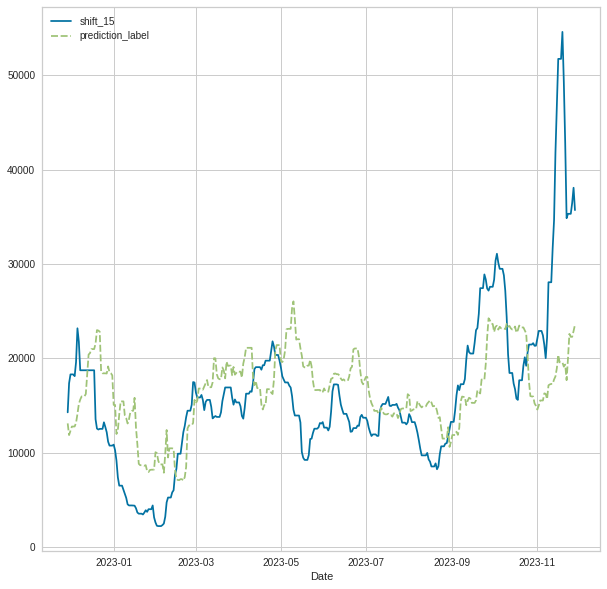

In [164]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.lineplot(data=Res[["shift_15","prediction_label"]])

In [165]:
Res=Res.sort_index()

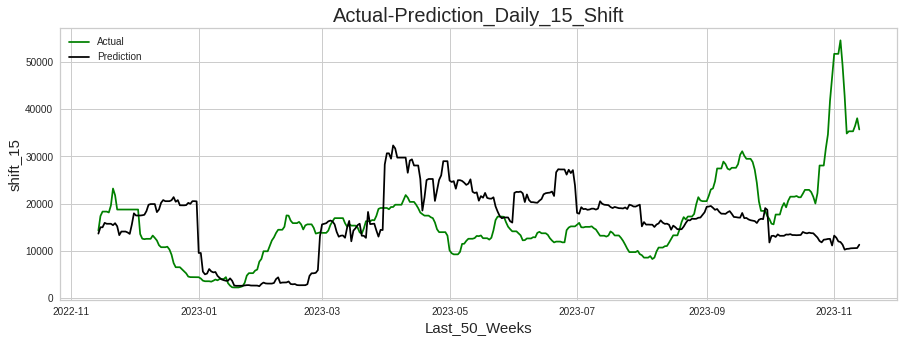

MAPE: 0.5620151731079979


In [341]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Daily_15_Shift",fontdict=font1)
plt.plot(Res["shift_15"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_15",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_15"].shape[0]):
    Mape.append((np.abs((Res["shift_15"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_15"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [167]:
pred2[["Value","shift_15","prediction_label"]]

Value  shift_15  prediction_label
Date                                           
2022-11-29  13177.0   14293.0      13123.530000
2022-11-30  13624.0   17374.0      11882.400000
2022-12-01  13020.0   18312.0      12323.475000
2022-12-02  12598.0   18312.0      12788.965000
2022-12-03  12598.0   18312.0      12796.975000
...             ...       ...               ...
2023-11-24  28071.0   35320.0      22599.035000
2023-11-25  28071.0   35320.0      22290.545000
2023-11-26  28071.0   36475.0      22290.545000
2023-11-27  31671.0   38082.0      22903.196667
2023-11-28  34656.0   35711.0      23567.955000

[365 rows x 3 columns]

In [268]:
X_Final[X_Final.index>"2021-03-20"]["Value"]>65000

Date
2021-03-21    False
2021-03-28    False
2021-04-04    False
2021-04-11    False
2021-04-18    False
              ...  
2023-10-22    False
2023-10-29    False
2023-11-05    False
2023-11-12    False
2023-11-19    False
Name: Value, Length: 140, dtype: bool

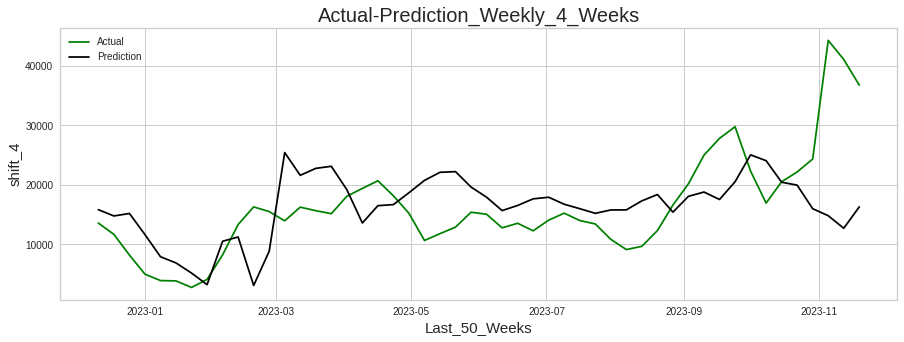

MAPE: 0.4245594723048683
directional_acc 66.0


In [561]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(Res["shift_4"],color="green",label="Actual")
plt.plot(Res["prediction_label"],color="black",label="Prediction")
plt.xlabel("Last_50_Weeks",fontdict=font2)
plt.ylabel("shift_4",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(Res["shift_4"].shape[0]):
    Mape.append((np.abs((Res["shift_4"].iloc[i] - Res['prediction_label'].iloc[i]) / Res["shift_4"].iloc[i])))

print("MAPE:",np.mean(Mape))
print("directional_acc",directional_acc(Res["prediction_label"],Res["shift_4"],T.Value))

In [342]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [343]:
directional_acc(Res["prediction_label"],Res["shift_15"],T["Value"])

59.45205479452055

In [187]:
V["Value"].iloc[-50:].tail()

Date
2019-12-22   -0.313620
2021-01-03   -0.192716
2018-06-17   -0.088087
2021-06-06    0.371471
2022-11-06   -0.689789
Name: Value, dtype: float32

In [188]:
Res.tail()

shift_4  prediction_label         diff       diff1_V  \
Date                                                                    
2019-12-22   8777.857422      13284.438564 -4506.581143   4934.428711   
2021-01-03  17860.427734      13001.237109  4859.190625   -987.572266   
2018-06-17  23544.000000      25327.983408 -1783.983408   5702.427734   
2021-06-06  31167.000000      30036.161602  1130.838398  28461.572266   
2022-11-06  13065.713867      15221.381631 -2155.667764   4287.856445   

                 diff1_P  
Date                      
2019-12-22   4577.172766  
2021-01-03    446.594199  
2018-06-17   6200.831768  
2021-06-06  26748.193040  
2022-11-06   1936.943066

In [448]:
Res["prediction_label"].tail()

Date
2023-10-22    16274.075771
2023-10-29    12999.847070
2023-11-05    12039.784258
2023-11-12    14026.037207
2023-11-19    16184.635791
Name: prediction_label, dtype: float64

In [1738]:
# Res.to_csv("4_shift_reg_Cape_with_Targ.csv")

In [750]:
X_Final.columns

Index(['5TC_CCURMON', '5TC_C+1MON', '5TC_C+2MON', '5TC_CCURQ', '5TC_C+1Q',
       'Value', 'Value_rollm_3', 'Value_rollm_7', 'Value_ewm_3', 'Value_ewm_7',
       'EMA_Value_ewm_3-Value_ewm_180', 'EMA_Value_ewm_3-Value_ewm_210',
       'EMA_Value_ewm_14-Value_ewm_150', 'EMA_Value_ewm_14-Value_ewm_180',
       'EMA_Value_ewm_14-Value_ewm_210', 'shift_4', '5TC_CCURMON_fshift_1',
       '5TC_C+1MON_fshift_1', '5TC_C+1MON_fshift_2', '5TC_C+1MON_fshift_3',
       '5TC_C+1MON_fshift_4', '5TC_C+2MON_fshift_1', '5TC_C+2MON_fshift_2',
       '5TC_C+2MON_fshift_3', '5TC_C+2MON_fshift_4', '5TC_CCURQ_fshift_1',
       '5TC_CCURMON_rollm_3', '5TC_CCURMON_rollm_4', '5TC_C+1MON_rollm_3',
       '5TC_C+1MON_rollm_4', '5TC_C+1MON_rollm_6', '5TC_C+1MON_rollm_8',
       '5TC_C+2MON_rollm_3', '5TC_C+2MON_rollm_4', '5TC_C+2MON_rollm_6',
       '5TC_C+2MON_rollm_8', '5TC_CCURQ_rollm_3', '5TC_CCURQ_rollm_4',
       '5TC_C+1Q_rollm_3', '5TC_C+1Q_rollm_4', 'Value_rollm_4',
       'Value_rollm_6', 'Value_ewm_3_r

In [234]:
Train=X_Final.iloc[:X_Final.shape[0]-50,:]
Test=X_Final.iloc[X_Final.shape[0]-50:,:]


In [235]:
Train.shape

(245, 53)

In [236]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(Train.drop("shift_4",axis=1))

In [237]:
Y_train = np.reshape(np.array(Train.shift_4), (-1,1))
Y_train= scaler.fit_transform(Y_train) 

In [238]:
X_train.shape

Train.shape

Train.shape

(245, 53)

In [239]:
Y_train.shape

(245, 1)

In [240]:
Y_test = np.reshape(np.array(Test.shift_4), (-1,1))
Y_test_S= scaler.fit_transform(Y_test) 

In [241]:
X_test = scaler.fit_transform(Test.drop("shift_4",axis=1))

X_test.shape

(50, 52)

In [248]:
earlystop = EarlyStopping(monitor='train_loss', min_delta=0.0001, patience=5,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [249]:
X_train

array([[0.10778308, 0.16236781, 0.24142222, ..., 0.29332892, 0.27272727,
        0.23076923],
       [0.09040808, 0.14504974, 0.21851218, ..., 0.29253335, 0.27272727,
        0.25      ],
       [0.09271272, 0.16897033, 0.25393823, ..., 0.29976587, 0.27272727,
        0.26923077],
       ...,
       [0.10732415, 0.08765113, 0.02069816, ..., 0.02082061, 0.90909091,
        0.86538462],
       [0.11336832, 0.11466192, 0.0271288 , ..., 0.00883978, 0.90909091,
        0.88461538],
       [0.11589742, 0.06985951, 0.        , ..., 0.        , 1.        ,
        0.90384615]])

In [250]:
import tensorflow
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from keras.layers import LSTM
hl=[50,45]
model = Sequential()
model.add(LSTM(X_train.shape[0],input_shape = (X_train.shape[1],1),return_sequences = True,
                    activation = 'relu'))
for i in range(len(hl)-1):        
    model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
model.add(LSTM(hl[-1],activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = 1e-3), loss = 'mean_squared_error')
#print(model.summary())

# Training the data
history = model.fit(X_train,Y_train,epochs =100,batch_size = 32,verbose = 1,shuffle = True, callbacks=callbacks_list)
train_loss=history.history['loss']

Epoch 1/100
8/8 [==============================] - 7s 343ms/step - loss: 0.0348
Epoch 2/100
8/8 [==============================] - 3s 328ms/step - loss: 0.0166
Epoch 3/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0142
Epoch 4/100
8/8 [==============================] - 3s 330ms/step - loss: 0.0128
Epoch 5/100
8/8 [==============================] - 3s 318ms/step - loss: 0.0124
Epoch 6/100
8/8 [==============================] - 3s 316ms/step - loss: 0.0124
Epoch 7/100
8/8 [==============================] - 3s 326ms/step - loss: 0.0125
Epoch 8/100
8/8 [==============================] - 3s 327ms/step - loss: 0.0126
Epoch 9/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0122
Epoch 10/100
8/8 [==============================] - 3s 317ms/step - loss: 0.0122
Epoch 11/100
8/8 [==============================] - 3s 317ms/step - loss: 0.0119
Epoch 12/100
8/8 [==============================] - 3s 328ms/step - loss: 0.0121
Epoch 13/100
8/8 [===================

8/8 [==============================] - 3s 315ms/step - loss: 0.0116
Epoch 64/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0118
Epoch 65/100
8/8 [==============================] - 3s 316ms/step - loss: 0.0115
Epoch 66/100
8/8 [==============================] - 3s 316ms/step - loss: 0.0116
Epoch 67/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0118
Epoch 68/100
8/8 [==============================] - 2s 314ms/step - loss: 0.0114
Epoch 69/100
8/8 [==============================] - 3s 316ms/step - loss: 0.0122
Epoch 70/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0117
Epoch 71/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0117
Epoch 72/100
8/8 [==============================] - 3s 315ms/step - loss: 0.0116
Epoch 73/100
8/8 [==============================] - 3s 326ms/step - loss: 0.0120
Epoch 74/100
8/8 [==============================] - 3s 317ms/step - loss: 0.0116
Epoch 75/100
8/8 [=======================

In [251]:
# from keras.models import Sequential
# from keras.callbacks import EarlyStopping
# from keras.layers import Dense
# from keras.layers import SimpleRNN
# from keras.layers import Dropout
# from keras.layers import GRU, Bidirectional
# from keras.optimizers import SGD
# from sklearn import metrics
# from sklearn.metrics import mean_squared_error

# from keras.layers import LSTM

# model = Sequential()
# model.add(LSTM(X_train.shape[0], return_sequences=True, input_shape=(X_train.shape[1],1),activation='tanh'))

# # model.add(Dense(units=5))
# # model.add(Dropout(0.2))
# # model.add(LSTM(50,return_sequences=True,activation='tanh'))

# # model1.add(LSTM(10,return_sequences=True))
# model.add(LSTM(25))
# model.add(Dense(units=1))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # model = Sequential()

# # model.add(LSTM(150,return_sequences=True,kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', batch_input_shape=(1,X_train.shape[1],1), stateful=True))
# # model.add(Dropout(0.3))
# # model.add(LSTM(25, batch_input_shape=(1,X_train.shape[1],1), kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',stateful=True))
# # model.add(Dropout(0.3))
# # model.add((Dense(1)))
# # model.compile(loss='mse', optimizer='adam')


# model.summary()

# # from keras.callbacks import ModelCheckpoint,EarlyStopping
# # file="weights.best_Baisc.hdf5"
# # checkpoint = ModelCheckpoint(file, monitor='loss', verbose=1, save_best_only=True, mode='min')
# # early_stop =  EarlyStopping(monitor='loss', min_delta=0.001, patience=200, verbose=1, mode='min')
# # callbacks = [checkpoint,early_stop]

In [196]:
X_test_2 = scaler.fit_transform(Test.iloc[:,:])

In [198]:
model.fit(X_train, Y_train, epochs =250, batch_size = 80,callbacks=callbacks_list)

Epoch 1/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0124
Epoch 2/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0122
Epoch 3/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0122
Epoch 4/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0122
Epoch 5/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0121
Epoch 6/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0121
Epoch 7/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0121
Epoch 8/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0122
Epoch 9/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0120
Epoch 10/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0120
Epoch 11/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0121
Epoch 12/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0121
Epoch 13/250
3/3 [===================

3/3 [==============================] - 1s 354ms/step - loss: 0.0118
Epoch 33/250
3/3 [==============================] - 1s 390ms/step - loss: 0.0118
Epoch 34/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0119
Epoch 35/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0118
Epoch 36/250
3/3 [==============================] - 1s 357ms/step - loss: 0.0118
Epoch 37/250
3/3 [==============================] - 1s 392ms/step - loss: 0.0118
Epoch 38/250
3/3 [==============================] - 1s 357ms/step - loss: 0.0118
Epoch 39/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0118
Epoch 40/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0118
Epoch 41/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0120
Epoch 42/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0119
Epoch 43/250
3/3 [==============================] - 1s 396ms/step - loss: 0.0118
Epoch 44/250
3/3 [=======================

3/3 [==============================] - 1s 352ms/step - loss: 0.0118
Epoch 96/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0117
Epoch 97/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0117
Epoch 98/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0116
Epoch 99/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0116
Epoch 100/250
3/3 [==============================] - 1s 350ms/step - loss: 0.0116
Epoch 101/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0116
Epoch 102/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0116
Epoch 103/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0115
Epoch 104/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0116
Epoch 105/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0115
Epoch 106/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0115
Epoch 107/250
3/3 [===============

3/3 [==============================] - 1s 349ms/step - loss: 0.0115
Epoch 128/250
3/3 [==============================] - 1s 310ms/step - loss: 0.0104
Epoch 129/250
3/3 [==============================] - 1s 310ms/step - loss: 0.0105
Epoch 130/250
3/3 [==============================] - 1s 309ms/step - loss: 0.0104
Epoch 131/250
3/3 [==============================] - 1s 346ms/step - loss: 0.0100
Epoch 132/250
3/3 [==============================] - 1s 346ms/step - loss: 0.0100
Epoch 133/250
3/3 [==============================] - 1s 346ms/step - loss: 0.0112
Epoch 134/250
3/3 [==============================] - 1s 347ms/step - loss: 0.0102
Epoch 135/250
3/3 [==============================] - 1s 312ms/step - loss: 0.0104
Epoch 136/250
3/3 [==============================] - 1s 309ms/step - loss: 0.0112
Epoch 137/250
3/3 [==============================] - 1s 348ms/step - loss: 0.0094
Epoch 138/250
3/3 [==============================] - 1s 408ms/step - loss: 0.0106
Epoch 139/250
3/3 [===========

3/3 [==============================] - 1s 354ms/step - loss: 0.0099
Epoch 159/250
3/3 [==============================] - 1s 355ms/step - loss: 0.0103
Epoch 160/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0091
Epoch 161/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0095
Epoch 162/250
3/3 [==============================] - 1s 351ms/step - loss: 0.0087
Epoch 163/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0086
Epoch 164/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0082
Epoch 165/250
3/3 [==============================] - 1s 355ms/step - loss: 0.0082
Epoch 166/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0088
Epoch 167/250
3/3 [==============================] - 1s 351ms/step - loss: 0.0081
Epoch 168/250
3/3 [==============================] - 1s 355ms/step - loss: 0.0080
Epoch 169/250
3/3 [==============================] - 2s 553ms/step - loss: 0.0076
Epoch 170/250
3/3 [===========

3/3 [==============================] - 1s 356ms/step - loss: 0.0090
Epoch 191/250
3/3 [==============================] - 1s 395ms/step - loss: 0.0068
Epoch 192/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0072
Epoch 193/250
3/3 [==============================] - 1s 393ms/step - loss: 0.0069
Epoch 194/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0066
Epoch 195/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0069
Epoch 196/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0065
Epoch 197/250
3/3 [==============================] - 1s 394ms/step - loss: 0.0069
Epoch 198/250
3/3 [==============================] - 1s 398ms/step - loss: 0.0067
Epoch 199/250
3/3 [==============================] - 1s 409ms/step - loss: 0.0065
Epoch 200/250
3/3 [==============================] - 1s 356ms/step - loss: 0.0064
Epoch 201/250
3/3 [==============================] - 1s 352ms/step - loss: 0.0068
Epoch 202/250
3/3 [===========

3/3 [==============================] - 1s 354ms/step - loss: 0.0061
Epoch 222/250
3/3 [==============================] - 1s 355ms/step - loss: 0.0061
Epoch 223/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0061
Epoch 224/250
3/3 [==============================] - 1s 358ms/step - loss: 0.0059
Epoch 225/250
3/3 [==============================] - 1s 391ms/step - loss: 0.0060
Epoch 226/250
3/3 [==============================] - 1s 392ms/step - loss: 0.0060
Epoch 227/250
3/3 [==============================] - 1s 358ms/step - loss: 0.0060
Epoch 228/250
3/3 [==============================] - 1s 354ms/step - loss: 0.0059
Epoch 229/250
3/3 [==============================] - 1s 391ms/step - loss: 0.0059
Epoch 230/250
3/3 [==============================] - 1s 353ms/step - loss: 0.0058
Epoch 231/250
3/3 [==============================] - 1s 387ms/step - loss: 0.0059
Epoch 232/250
3/3 [==============================] - 1s 357ms/step - loss: 0.0059
Epoch 233/250
3/3 [===========

In [212]:
y_RNN = model.predict(X_test)

3/3 [==============================] - 1s 64ms/step


In [218]:
y_RNN.shape

(70, 1)

In [216]:
X_test.shape

(70, 52)

In [224]:
prediction_copies = np.repeat(y_RNN, X_test.shape[1], axis=-1)

In [225]:
prediction_copies.shape

(70, 52)

In [229]:
# # invert scaling for forecast

Y_Rnn_n = scaler.inverse_transform(prediction_copies)[:,0]

In [230]:
Y_Rnn_n

array([13817.819 , 13573.28  , 13061.629 , 12197.416 , 10906.373 ,
        9665.088 ,  8749.572 ,  8185.226 ,  8243.065 ,  8831.687 ,
        9505.752 ,  9899.295 ,  9851.1045,  9548.359 ,  9162.126 ,
        8637.792 ,  8222.185 ,  7782.018 ,  7509.0225,  7338.139 ,
        7302.9297,  7444.3823,  7735.593 ,  7750.958 ,  7763.885 ,
        7703.1885,  7455.02  ,  6930.125 ,  6480.895 ,  6104.0596,
        5772.039 ,  5682.795 ,  6172.377 ,  6946.4043,  7940.088 ,
        8854.422 ,  9638.523 , 10409.308 , 10905.926 , 11127.317 ,
       11412.079 , 11729.414 , 11965.382 , 11942.632 , 11693.776 ,
       11273.581 , 10813.329 , 10465.879 , 10371.832 , 10466.855 ,
       10326.284 , 10223.673 ,  9936.546 ,  9805.508 ,  9883.356 ,
        9965.382 , 10086.874 ,  9871.87  ,  9574.696 ,  9377.122 ,
        9359.178 ,  9744.039 , 10305.664 , 10652.522 , 10855.821 ,
       11013.1875, 10912.511 , 10469.515 , 10091.272 ,  9945.324 ],
      dtype=float32)

Text(0.5, 1.0, 'Basic LSTM_$_Layers_17_neuron each')

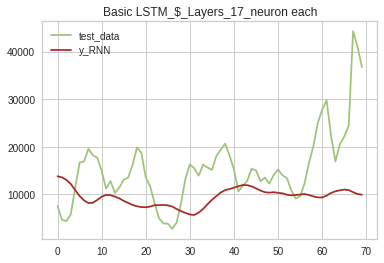

In [233]:
plt.plot(Y_test, label = "test_data", color = "g")
plt.plot(Y_Rnn_n, label = "y_RNN", color = "brown")
plt.legend()
plt.title("Basic LSTM_$_Layers_17_neuron each")

In [232]:
res=pd.DataFrame()

In [170]:
res["pred"]=Y_Rnn_n
res["Actual"]=Y_test

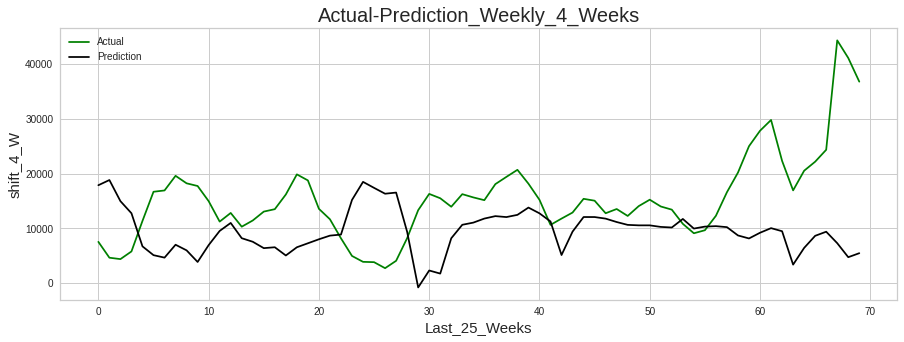

MAPE: 0.7426822084241785


In [187]:
font1 = {'size':20}
font2 = {'size':15}
plt.figure(figsize=(15,5))
plt.title("Actual-Prediction_Weekly_4_Weeks",fontdict=font1)
plt.plot(res["Actual"],color="green",label="Actual")
plt.plot(res["pred"],color="black",label="Prediction")
plt.xlabel("Last_25_Weeks",fontdict=font2)
plt.ylabel("shift_4_W",fontdict=font2)
plt.legend()
plt.show()
# print("Directional_Accuracy=",directional_acc(Res.diff1_P.values,Res.diff1_V.values))
Mape=[]
Mape=[]
for i  in range(res["pred"].shape[0]):
    Mape.append((np.abs((res["Actual"].iloc[i] - res['pred'].iloc[i]) / res["Actual"].iloc[i])))

print("MAPE:",np.mean(Mape))

In [820]:
X_test

array([[0.76621145, 1.        , 1.        , ..., 1.        , 0.54545455,
        0.54901961],
       [0.6716166 , 0.77260729, 0.84006885, ..., 0.93770096, 0.54545455,
        0.56862745],
       [0.46077043, 0.67241615, 0.70916627, ..., 0.84218751, 0.63636364,
        0.58823529],
       ...,
       [0.57757816, 0.43090763, 0.19770763, ..., 0.1494706 , 0.90909091,
        0.84313725],
       [0.641917  , 0.49195224, 0.20644263, ..., 0.13016245, 0.90909091,
        0.8627451 ],
       [0.72315815, 0.58332196, 0.26785196, ..., 0.12682925, 0.90909091,
        0.88235294]])

Text(0.5, 1.0, 'Basic LSTM_$_Layers_17_neuron each')

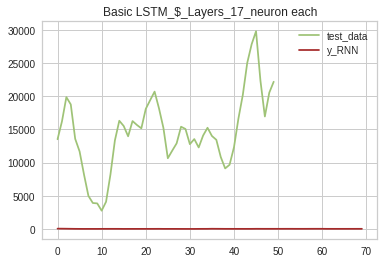

In [821]:
plt.plot(np.array(X_Final["Value"].iloc[-50:]), label = "test_data", color = "g")
plt.plot( Y_Rnn_n[:,-1], label = "y_RNN", color = "brown")
plt.legend()
plt.title("Basic LSTM_$_Layers_17_neuron each")

In [822]:
inv_yhat = np.concatenate( [X_test,y_RNN], axis=1)
inv_yhat

array([[0.76621145, 1.        , 1.        , ..., 0.54545455, 0.54901961,
        0.87827438],
       [0.6716166 , 0.77260729, 0.84006885, ..., 0.54545455, 0.56862745,
        0.78828382],
       [0.46077043, 0.67241615, 0.70916627, ..., 0.63636364, 0.58823529,
        0.63022149],
       ...,
       [0.57757816, 0.43090763, 0.19770763, ..., 0.90909091, 0.84313725,
        0.28745136],
       [0.641917  , 0.49195224, 0.20644263, ..., 0.90909091, 0.8627451 ,
        0.31933236],
       [0.72315815, 0.58332196, 0.26785196, ..., 0.90909091, 0.88235294,
        0.31800979]])

In [823]:
# # invert scaling for forecast
inv_yhat = np.concatenate( [X_test,Y_Rnn_n[:,-1].reshape(-1,1)], axis=1)
Y_Rnn_n = scaler.inverse_transform(inv_yhat)



In [331]:
Y_Rnn_n[:,0]

array([18089.        , 18089.        , 18089.        , 16945.28571429,
       10083.        , 10083.        , 10083.        , 10083.        ,
        8050.85714286,  7238.        ,  7238.        ,  7238.        ,
       14176.57142857, 16952.        , 16952.        , 16952.        ,
       16338.28571429, 14804.        , 14804.        , 14804.        ,
       14804.        , 18982.        , 18982.        , 18982.        ,
       18982.        , 18043.14285714, 17339.        , 17339.        ,
       17339.        , 16229.28571429, 13455.        , 13455.        ,
       13455.        , 13455.        , 11512.71428571, 11189.        ,
       11189.        , 11189.        , 13509.71428571, 16604.        ,
       16604.        , 16604.        , 17896.28571429, 25650.        ,
       25650.        , 25650.        , 25650.        , 25212.85714286,
       25038.        , 25038.        ])

In [332]:
Tag_f["Value"].iloc[-50:]

Date
2023-01-08    13569.571429
2023-01-15    11666.285714
2023-01-22     8190.571429
2023-01-29     4979.857143
2023-02-05     3905.285714
2023-02-12     3847.142857
2023-02-19     2749.571429
2023-02-26     4095.571429
2023-03-05     8226.571429
2023-03-12    13322.714286
2023-03-19    16291.428571
2023-03-26    15498.857143
2023-04-02    13950.000000
2023-04-09    16245.428571
2023-04-16    15653.142857
2023-04-23    15147.857143
2023-04-30    18075.714286
2023-05-07    19394.142857
2023-05-14    20680.857143
2023-05-21    18152.142857
2023-05-28    15214.714286
2023-06-04    10646.428571
2023-06-11    11790.142857
2023-06-18    12893.000000
2023-06-25    15394.857143
2023-07-02    15054.000000
2023-07-09    12763.571429
2023-07-16    13536.571429
2023-07-23    12271.571429
2023-07-30    14065.285714
2023-08-06    15235.714286
2023-08-13    13998.857143
2023-08-20    13420.142857
2023-08-27    10833.142857
2023-09-03     9113.857143
2023-09-10     9666.857143
2023-09-17    12305.857

In [333]:
X_Final["Value"].iloc[-50:]

Date
2022-12-11    13507.285714
2022-12-18    16186.142857
2022-12-25    19851.714286
2023-01-01    18749.000000
2023-01-08    13569.571429
2023-01-15    11666.285714
2023-01-22     8190.571429
2023-01-29     4979.857143
2023-02-05     3905.285714
2023-02-12     3847.142857
2023-02-19     2749.571429
2023-02-26     4095.571429
2023-03-05     8226.571429
2023-03-12    13322.714286
2023-03-19    16291.428571
2023-03-26    15498.857143
2023-04-02    13950.000000
2023-04-09    16245.428571
2023-04-16    15653.142857
2023-04-23    15147.857143
2023-04-30    18075.714286
2023-05-07    19394.142857
2023-05-14    20680.857143
2023-05-21    18152.142857
2023-05-28    15214.714286
2023-06-04    10646.428571
2023-06-11    11790.142857
2023-06-18    12893.000000
2023-06-25    15394.857143
2023-07-02    15054.000000
2023-07-09    12763.571429
2023-07-16    13536.571429
2023-07-23    12271.571429
2023-07-30    14065.285714
2023-08-06    15235.714286
2023-08-13    13998.857143
2023-08-20    13420.142

In [334]:
def directional_acc(pred,actual,base):
    pred=np.sign(pred-base)
    actual=np.sign(actual-base)
    score=np.sum(actual == pred)
    return(score*100/len(pred))

In [335]:
directional_acc(pd.DataFrame(Y_Rnn_n[:,-1]).values,pd.DataFrame(Y_test).values,X_Final["Value"].iloc[-50:].values)

2582.0

In [336]:
Mape=[]
for i  in range(len(Y_Rnn_n[:,-1])):
    Mape.append((Y_test[i] - Y_Rnn_n[:,-1][i]) / X_Final["Value"].iloc[-50:][i])

print("MAPE:",np.mean(Mape))

MAPE: -27432.871566582893


In [337]:
pd.DataFrame(Y_Rnn_n[:,-1])

0
0   1.499569e+08
1   2.111037e+08
2   2.373878e+08
3   2.034522e+08
4   1.768357e+08
5   1.811203e+08
6   2.015297e+08
7   1.888777e+08
8   2.246659e+08
9   2.947726e+08
10  3.319687e+08
11  4.378865e+08
12  5.116076e+08
13  5.197210e+08
14  5.571692e+08
15  5.550470e+08
16  5.850797e+08
17  6.080375e+08
18  5.696401e+08
19  4.997347e+08
20  4.218635e+08
21  4.333332e+08
22  4.346303e+08
23  4.073970e+08
24  3.893416e+08
25  3.718315e+08
26  3.465048e+08
27  2.219048e+08
28  1.622459e+08
29  2.448935e+08
30  2.343050e+08
31  2.302978e+08
32  2.035452e+08
33  2.005621e+08
34  1.913361e+08
35  1.941008e+08
36  2.012675e+08
37  1.752382e+08
38  1.819809e+08
39  2.325479e+08
40  2.475317e+08
41  2.535341e+08
42  2.644200e+08
43  2.715394e+08
44  2.853899e+08
45  3.204408e+08
46  3.383167e+08
47  3.929773e+08
48  4.271810e+08
49  4.748596e+08

In [185]:
#Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []

    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)

    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)

    # Adding Layers to the model
    model = Sequential()
    model.add(SimpleRNN(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                        activation = 'relu'))
    for i in range(len(hl)-1):        
        model.add(SimpleRNN(hl[i],activation = 'relu',return_sequences = True))
    model.add(SimpleRNN(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')
    #print(model.summary())

    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

def forecast(model,train,n_days_for_forecast):
    X_train = []
    Y_train = []

    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)

    n_days_for_prediction=n_days_for_forecast
    prediction = model.predict(X_train[-n_days_for_prediction:])
    prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
    y_pred_future = sc.inverse_transform(prediction_copies)[:,0]

    forecast_dates = []
    for time_i in predict_period_dates:
        forecast_dates.append(time_i.date())

    df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'AL_cash_settlement':y_pred_future})
    df_forecast['Date']=pd.to_datetime(df_forecast['Date'])
#     df_forecast.to_excel('multivariate-3-RNN-forecast.xlsx')
    return df_forecast

# Evaluating the model
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)

    # Prediction Time !!!!
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r = r2_score(Y_test,Y_hat)

    bdp =1- np.round(np.min(np.abs(Y_hat-Y_test)/ Y_test),2)
    ldp =1- np.round(np.max(np.abs(Y_hat-Y_test)/ Y_test),2)


    mape = mean_absolute_percentage_error(Y_test,Y_hat)
    return mse, rmse, r, Y_test, Y_hat, mape, bdp*100, np.clip(ldp,0.7,1)*100

# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.figure(figsize = (20,7))
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.title("Price Prediction using Multivatiate-RNN")
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.figure(figsize = (20,7))
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title('Loss Plot')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()


In [186]:
series = df
print(series.shape)
print(series.tail())
        
 

(4200, 8)
            Date  FFACapeO010118  C3010118  C5010118  C5TC010118  020707  \
4195  14/12/2017             NaN       NaN       NaN         NaN  1281.0   
4196  15/12/2017             NaN       NaN       NaN         NaN  1281.0   
4197  27/12/2017             NaN       NaN       NaN         NaN  2219.0   
4198  28/12/2017             NaN       NaN       NaN         NaN  2219.0   
4199  29/12/2017             NaN       NaN       NaN         NaN  2219.0   

      010118  CapeOI010118  
4195     NaN           NaN  
4196     NaN           NaN  
4197     NaN           NaN  
4198     NaN           NaN  
4199     NaN           NaN  


In [ ]:
       
        n_past = 15
        n_days_for_prediction=90
        train_data = series[:int(len(series)*0.8)].dropna()
        val_data = series[int(len(series)*0.8):int(len(series)*0.9)].dropna()
        test_data = series[int(len(series)*0.9):int(len(series)*1)].dropna()
        
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        print(train_data.shape,val_data.shape,test_data.shape)
        
        
         # Normalisation
        sc = MinMaxScaler()
        train = sc.fit_transform(train_data)
        val = sc.transform(val_data)
        test = sc.transform(test_data)
        print(train.shape,val.shape,test.shape)
        
        timesteps = 30
        hl = [50,45]
        lr = 1e-3
        batch_size = 124
        num_epochs = 10
        
        model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
        #plot_error(train_error,val_error)
        
        mse, rmse, r2_value,true,predicted, mape,bdp, ldp = evaluate_model(model,test,30)
        # print('MSE = {}'.format(mse))
        # print('RMSE = {}'.format(rmse))
        # print('R-Squared Score = {}'.format(r2_value))
        # print('MAPE Score = {}'.format(mape))
        # print('BDP = {}'.format(bdp))
        # print('LDP = {}'.format(ldp))
        
        #plot_data(true,predicted)
        
        true = true.reshape(-1, 1)
        predicted = predicted.reshape(-1, 1)
        cols = list(series)[0:35]
        df_for_training = df[cols].astype(float)
        true_copies = np.repeat(true, df_for_training.shape[1], axis=-1)
        predicted_copies = np.repeat(predicted, df_for_training.shape[1], axis=-1)
        
        
        
        actualvalue = sc.inverse_transform(true_copies)[:,0]
        predictedvalue = sc.inverse_transform(predicted_copies)[:,0]
        
        
        actualvalue = actualvalue.tolist()
        predictedvalue = predictedvalue.tolist()
        actualVSpredicted = pd.DataFrame(
            {'Actual': actualvalue,
             'Predicted': predictedvalue
            })#.to_excel('actualVSpredicted-2022-02-21.xlsx', index=False)
        resultant_dfalt = resultant_df.reset_index(level=0)
        li = resultant_dfalt['index'].tail(len(test_data)-timesteps).tolist()
        actualVSpredicted['Dates'] = pd.DataFrame({'col':li})
        
        
        
        n_past = 10
        n_days_for_prediction=90
        
        train_data = series[:int(len(series)*0.9)]
        val_data = series[int(len(series)*0.9):int(len(series)*1)]
        
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction).tolist()
        
        
        
        train_data = series[:int(len(series)*1)]
        train_dates = pd.to_datetime(train_data.index)
        predict_period_dates = pd.date_range(max(train_dates)+dt.timedelta(days=1), periods=n_days_for_prediction).tolist()
        
        # Normalisation
        sc = MinMaxScaler()
        train = sc.fit_transform(train_data)
        val = sc.transform(val_data)
        
        
        timesteps = 30
        hl = [50,45]
        lr = 1e-3
        batch_size = 32
        num_epochs = 100
        
        X_train = []
        Y_train = []